## **Desafio diabetes**

### **Desafío: hora de la práctica**



Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este [enlace](./data/diabetes.csv).

1 - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con <mark>pandas</mark>.

2 - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro <mark>stratify</mark> a partir de la variable objetivo para mantener la proporción de los datos.

3 - La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) y [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro <mark>max_depth</mark> del algoritmo <mark>DecisionTreeClassifier</mark> y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

4 - La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método <mark>predict</mark> para generar las predicciones de los valores y comparar con los valores reales de la base de datos.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# paso 1

diabetek = pd.read_csv('./data/diabetes.csv')
diabetek 

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [3]:
# division de datos para la construccion del modelo para ML
X = diabetek.drop(columns='diabetes', axis=1)
y = diabetek.diabetes


In [4]:
# Dividir los datos en entrenamiento, validación y prueba

# 5% para prueba
X, X_test, y, y_test = train_test_split(X, y, test_size=0.05, stratify=y, random_state=42)

# 25% del 95% restante para validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

print(f"Conjuntos:\n- Entrenamiento: {len(X_train)}\n- Validación: {len(X_val)}\n- Prueba: {len(X_test)}")

Conjuntos:
- Entrenamiento: 280
- Validación: 94
- Prueba: 20


In [5]:
# Crear modelos de arbol con profundidad limitada
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
forest_model = RandomForestClassifier(max_depth=2, random_state=42)

# Entrenamos modelos
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
# Evaluaremos la precisión (accuracy)
acc_tree_train = accuracy_score(y_train, tree_model.predict(X_train))
acc_tree_test = accuracy_score(y_test, tree_model.predict(X_test))

acc_forest_train = accuracy_score(y_train, forest_model.predict(X_train))
acc_forest_test = accuracy_score(y_test, forest_model.predict(X_test))

print(f"\nÁrbol de decisión:\n- Entrenamiento: {acc_tree_train:.2f}\n- Prueba: {acc_tree_test:.2f}")
print(f"\nBosque aleatorio:\n- Entrenamiento: {acc_forest_train:.2f}\n- Prueba: {acc_forest_test:.2f}")


Árbol de decisión:
- Entrenamiento: 0.81
- Prueba: 0.75

Bosque aleatorio:
- Entrenamiento: 0.79
- Prueba: 0.65



Matriz de Confusión - Árbol de Decisión


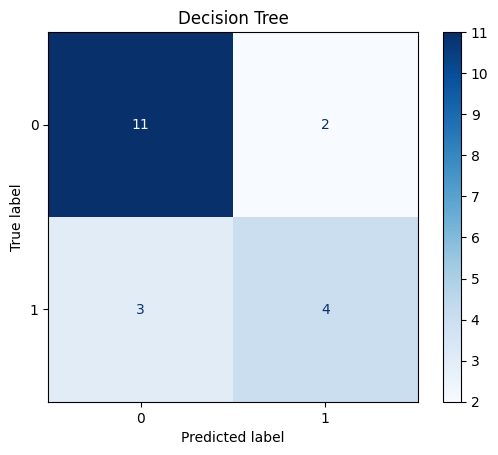


Matriz de Confusión - Random Forest


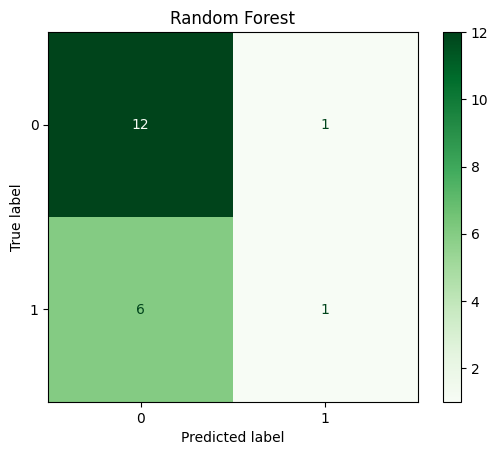

In [7]:
# Matrices de confusión
y_pred_tree = tree_model.predict(X_test)
y_pred_forest = forest_model.predict(X_test)

# Mostrar matriz Árbol de Decisión
print("\nMatriz de Confusión - Árbol de Decisión")
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree_model.classes_)
disp_tree.plot(cmap="Blues")
plt.title("Decision Tree")
plt.show()

# Mostrar matriz Random Forest
print("\nMatriz de Confusión - Random Forest")
cm_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(confusion_matrix=cm_forest, display_labels=forest_model.classes_)
disp_forest.plot(cmap="Greens")
plt.title("Random Forest")
plt.show()

## **Desafio N° 2**



Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero usando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este [enlace](./data/diabetes.csv).

Estos desafíos dependen del modelo generado en los desafíos de la clase 1.

1 - Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

2 - Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método <mark>RocCurveDisplay.from_predictions</mark>.

3 - Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método <mark>PrecisionRecallDisplay.from_predictions</mark>.

4 - Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función <mark>classification_report</mark> de la biblioteca Scikit-Learn.

Como consejo, revisa la documentación de <mark>Scikit-learn</mark> desde este [enlace](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) y verifica una forma de presentar los resultados de las curvas en el mismo gráfico usando matplotlib.


In [8]:
from sklearn.metrics import RocCurveDisplay

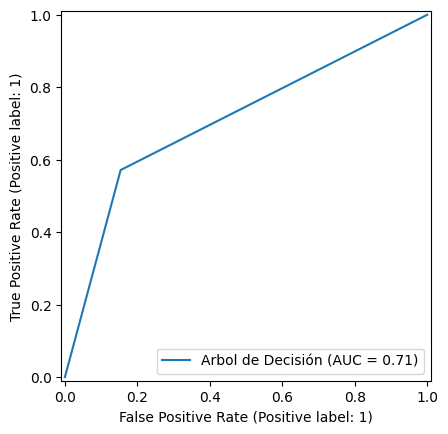

In [9]:
RocCurveDisplay.from_predictions(y_test, y_pred_tree, name='Arbol de Decisión');

In [10]:
from sklearn.metrics import roc_auc_score
print(f'El area bajo la curva ROC es: {roc_auc_score(y_test, y_pred_tree):2%}')

El area bajo la curva ROC es: 70.879121%


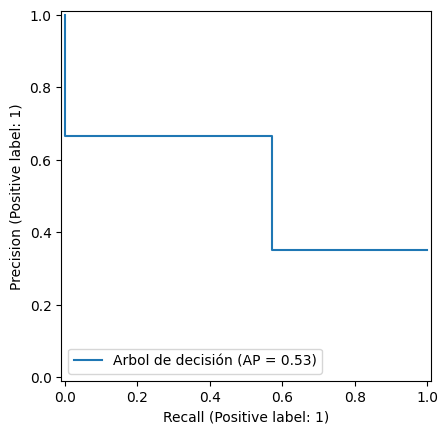

In [11]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_test, y_pred_tree, name='Arbol de decisión');

In [12]:
from sklearn.metrics import average_precision_score


In [13]:
print(f'El score promedio de precision vs recall es: {average_precision_score(y_test, y_pred_tree):2%}')

El score promedio de precision vs recall es: 53.095238%


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.67      0.57      0.62         7

    accuracy                           0.75        20
   macro avg       0.73      0.71      0.72        20
weighted avg       0.74      0.75      0.75        20



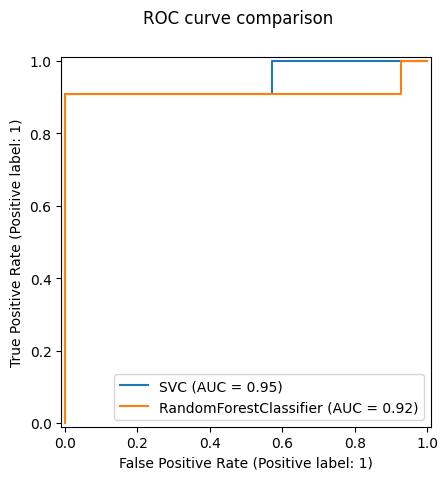

In [16]:
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils.fixes import parse_version

X, y = make_classification(random_state=0)

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# plot_roc_curve has been removed in version 1.2. From 1.2, use RocCurveDisplay instead.
# svc_disp = plot_roc_curve(svc, X_test, y_test)
# rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=svc_disp.ax_)
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

## **Desafío: hora de la práctica**

Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este [enlace](./data/diabetes.csv).

1 - En el proceso de validación cruzada, se generan diferentes modelos para cada división realizada en los datos y, en consecuencia, diferentes valores de métricas de evaluación. Para encontrar un resultado promedio de las métricas, se puede construir un intervalo de confianza a partir de la media y la desviación estándar de las métricas. Crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar. La función necesita 2 parámetros: uno para recibir una lista con los resultados de las métricas de la validación cruzada y otro para recibir el nombre del algoritmo. Para generar el intervalo de confianza, extrae la media de los resultados de la lista y la desviación estándar. El intervalo de confianza debe ser presentado en un print con el valor mínimo siendo la media restada de 2 desviaciones estándar y el valor máximo siendo la media sumada de 2 desviaciones estándar. Ejemplo de retorno de la función:

        Intervalo de confianza ("nombre del modelo"): ["valor mínimo del intervalo", "valor máximo del intervalo"]

2 - KFold es la estrategia más simple de validación cruzada, que permite la división aleatoria de los datos en k partes, siendo utilizada una parte para validación y el resto para entrenamiento del modelo. El proceso de creación de modelos se repite hasta que todas las partes son utilizadas como validación. Sabiendo esto, evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método <mark>KFold</mark>, usando 10 partes, con el uso del parámetro <mark>n_splits</mark> y mezclando los datos antes de la separación con el parámetro <mark>shuffle</mark>. Usa el método <mark>cross_val_score</mark> que no retorna el tiempo de ejecución, solo las métricas.

3 - En el proceso de división de datos con el KFold aleatorio, puede ser que la proporción de cada categoría de la variable objetivo no se mantenga en cada una de las partes de los datos. Para mantener esa proporción en cada una de las partes, podemos utilizar el KFold estratificado, haciendo que el proceso de validación de datos sea mucho más consistente. Evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada (<mark>cross_val_score</mark>) con el método <mark>StratifiedKFold</mark>, usando el parámetro <mark>n_splits</mark> y mezclando los datos antes de la separación con el parámetro <mark>shuffle</mark> y evaluando la métrica F1-Score usando el parámetro <mark>scoring</mark>.

4 - En conjuntos de datos con pocos registros (pocas filas), las estrategias de separación de los datos para validación pueden hacer que quede poca información en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patrón de los datos. El <mark>LeaveOneOut</mark> es una estrategia para sortear este problema, utilizando solo un registro como dato de validación. Evalúa el desempeño de los modelos utilizando la validación cruzada (<mark>cross_val_score</mark>) con el método <mark>LeaveOneOut</mark>.

El método LeaveOneOut generará un modelo para cada una de las filas de la base de datos, por lo tanto, la lista de resultados tendrá tasa de acierto solo de 0 o 1 para cada modelo. De esta forma, extrae solo la media del resultado con el método <mark>mean()</mark>, sin utilizar el intervalo de confianza.
